<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Random_Projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
from IPython.display import Image
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
## Issue in PCA/MDS
- Time complexity is important. For example: PCA on a matrix of size $N\times D$, takes $𝑂(D^2\times N+D^3)$ time. If $D$ is huge (say 10000), PCA can be as slow as a snail.

- PCA can be misguided by the outlier. Because we minimizes $L_2$ norm. it has the same issues a least-squares by being sensitive to outliers. 

## Introduce the random projection
It is a very simple but powerful algorithm. 

- Initialize a random matrix $R$ of size $D\times d$ and (normalize the rows of $R$ making them unit length vectors).

- Apply the matrix multiplciation, $f(\m{X})=\m{X}R$. 

As easy as that !!

- Very Fast. When performing Random Projection, the vectors are chosen randomly making it very efficient.  Time complexity = $𝑂(ND𝑑)$, which is much smaller than PCA.

- Will robust to outlier. 


The question remains
- How to choose the random $R$? What kind of distribution?

- How to pick $d$? Can we pick any $d$?

- Why it will work?

### Determining the Random Directions of the Projection Matrix
- **Gaussian Random Projection**: The projection matrix is constructed by choosing elements randomly from a Gaussian distribution with mean zero.
  $$ R = A/\sqrt{d}, A_{ij}\sim N(0,1)$$

- **Sparse Random Projection**: This is a comparatively simpler method, where each vector component is a value from the set ${-\sqrt{\frac{s}{d}},0,+\sqrt{\frac{s}{d}}}$, where $s$ is a constant, $s=1,2,\sqrt{d}, d/\log(d)$.
$$R_{ij}= \begin{cases}\sqrt{\frac{s}{d}}, & p =\frac{1}{2s} \\ -\sqrt{\frac{s}{d}}, & p =\frac{1}{2s} \\ 0, & p=1-\frac{1}{s} \end{cases} $$
One simple scheme for generating the elements of this matrix, also called the Achlioptas method is to set 
$$R_{ij}= \begin{cases}\sqrt{3/d}, & p =\frac{1}{6} \\ -\sqrt{3/d}, & p =\frac{1}{6} \\ 0, & p=\frac{2}{3} \end{cases} $$


In case of the Random Projection technique, the projection matrix does not have to be an orthogonal matrix when very high-dimensional data is involved. It relies on the result presented by Hecht-Neilsen i.e. **In a high dimensional space, there exists a much larger number of almost orthogonal than orthogonal directions. Thus the vectors with random directions might be sufficiently close to orthogonal**, and equivalently $R^\top R$ would approximate an identity matrix.


## How does the Random Projection work? 
### Johnson-Lindenstrauss Lemma

**Lemma:** For any $0<\epsilon < 1/2$ and any integer $N$, let $d$ be a positive integer such that 
$$ d\ge 4(\epsilon^2/2 -\epsilon^3/3)^{-1}\ln N, \alpha>0$$
Then for any set $V$ of $N$ points in $\mb{R}^D$, there is a linear map $f: \mb{R}^D\rightarrow \mb{R}^d$ such that for all $\m{x}, \m{y}\in V$,
$$(1-\epsilon)\|\m{x}-\m{y}\|^2 \le \|f(\m{x})-f(\m{y})\|^2\le (1+\epsilon)\|\m{x}-\m{y}\|^2 $$

Such a $f$ in fact can be found in randomized polynomial time. In fact, this inequality holds with high probability. 

**Basic idea:** If the data points lie in a very high-dimensional space, then projecting such points on simple random directions almostly preserves their pairwise distances.

Thus, the structure of data and clusters within data are maintained in a lower-dimensional space, while the complexity and size of data are reduced substantially.

**Remark:**

- This lemma is a very strong statement. Almost isometry is achieved with a **uniform** metric distortion bound (Bi-Lipschitz bound), with high probability, rather than average metric distortion control. 

- The projected dimension $d$ and the distortion factor $\epsilon$ is independent with the original ambient dimension $D$ and the geometry of these $N$ points. Nontrivial!

- This $d$ in the lemma is also optimal, i.e., there exists an example of $N$ points in $\mb{R}^D$ for which no scaled projection onto a subspace of dimension $m\ll \log(N)$ is an approximate isometry. (think about it.)

- It is particularly useful when $D\gg N$. 





The detail of the proof refers to [link](https://cseweb.ucsd.edu/~dasgupta/papers/jl.pdf).

**idea of the proof:**  use the concentration of
Lipschitz functions on the sphere to examine how the random projection $P$ acts on a fixed vector $\m{x}-\m{y}$ and then
take union bound over all $N^2$ difference $\m{x}-\m{y}$. 

**sketchy proof:** 
-  Without loss of generality, we may assume that $\|\m{u}\|_2=1$.  Next,
we consider an equivalent model: instead of a random projection $P$ acting on a
fixed vector $\m{u}$, we consider a fixed projection $P$ acting on a random vector $\m{u}$. 
Specifically, the distribution of $\|P\m{u}\|_2$ will not change if we let $P$ be fixed and $\m{u}\sim \text{unif}(S^{D-1})$ (rotation invariance). 


- Using rotation invariance again, we may assume without loss of generality that
$P$ is the coordinate projection onto the first $d$ coordinates in $\mb{R}^D$. 
 $$\mb{E}\|P\m{u}\|_2^2 = \mb{E}\left(\sum_{i=1}^d u_i^2\right)=\sum_{i=1}^d \mb{E}u_i^2=d \mb{E}u_1^2$$

- since the coordinates $u_i$ of the random vector $\m{u}\sim \text{unif}(S^{D-1})$  are identically
distributed. 
$$1= \|\m{u}\|_2^2 = \sum_{i=1}^D u_i^2 $$
Taking expectations of both sides, we obtain $\mb{E}u_1^2 =\frac{1}{D}$.  We will get $\mb{E}\|P\m{u}\|_2^2 =\frac{d}{D}$. Equivalently, we have shown for any fixed point $\m{v}$,  $(\mb{E}\|P\m{v}\|_2^2)^{1/2}= \sqrt{\frac{d}{D}}\|\m{v}\|_2$. 

- Define $f(\m{x})=\|P\m{x}\|_2 $,  is a Lipschitz function on $S^{D-1}$ and $\|f\|_{\text{lip}}=1$. Then concentration
inequality gives 
$$ \mb{P}\left\{\left|\|P\m{u}\|_2-\sqrt{\frac{d}{D}}\right|\ge t \right\}\le 2\exp(-cDt^2)$$
Choosing $t= \epsilon\sqrt{\frac{d}{D}} $. So with probability at least $1-2\exp(-c\epsilon^2 d)$, we have 
$$(1-\epsilon)\sqrt{\frac{d}{D}}\|\m{u}\|_2\le \|P\m{u}\|_2 \le (1+\epsilon)\sqrt{\frac{d}{D}}\|\m{u}\|_2 $$

- Consider the difference set, $d\m{X} =\{\m{x}-\m{y}: \m{x}, \m{y}\in \m{X}\}$ contains all pairwise difference of the dataset. 
Define the projection $Q=P\sqrt{\frac{D}{d}}$, with the same probability 
$$(1-\epsilon)\|\m{u}\|_2\le \|Q\m{u}\|_2 \le (1+\epsilon)\|\m{u}\|_2 $$
holds for all $\m{u}\in d\m{X}$. 

- It remains to take a union bound over $\m{u}\in d\m{X}$. It follows that inequality holds simultaneously for all $\m{u}\in d\m{X}$ with probability
at least $$1- |d\m{X}|2\exp(-cd\epsilon^2) \ge 1- 2N^2 \exp(-cd\epsilon^2) $$
If $d\ge (C/\epsilon^2)\log(N)$, then this probability is at least $1-2\exp(-cd\epsilon^2/2)$. These constants can be quantified with detailed analysis. 




The corollary of Johnson-Lindenstrauss Lemma is the **norm preservation theorem**. It states that for all $\m{x}\in\mb{R}^D$, the norm of the random projection $f(\m{x})$ approximately maintains the norm of the original $\m{x}$ with probability: 
   $$ \mb{P}\{(1-\epsilon)\|\m{x}\|^2\le \|f(\m{x})\|\le (1+\epsilon)\|\m{x}\|^2\}\ge 1- 2\exp(-(\epsilon^2 -\epsilon^3)d/4)$$
where $\epsilon\in (0,1/2)$.



In [ ]:
def jl_min_dim(N,eps):
  d = 4*log(N)/(eps**2/2-eps**3/3)
  return d

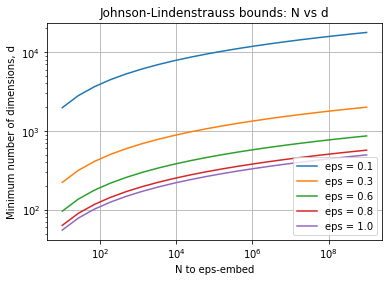

In [ ]:
# range of eps
eps_range = np.linspace(0.1, 1.0, 5)

# range of number of samples N to embed
n_samples_range = np.logspace(1, 9, 20) # 10^1, 10^2, ... 10^9
plt.figure()
for eps in eps_range:
  min_d=jl_min_dim(n_samples_range,eps)
  plt.loglog(n_samples_range, min_d)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("N to eps-embed")
plt.ylabel("Minimum number of dimensions, d")
plt.title("Johnson-Lindenstrauss bounds: N vs d")
plt.grid() 
plt.show()  

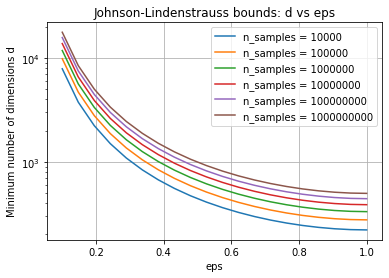

In [ ]:
eps_range = np.linspace(0.1, 1.0, 20)
n_samples_range = np.logspace(4, 9, 6)
plt.figure()
for n_samples in n_samples_range:
  min_d=jl_min_dim(n_samples,eps_range)
  plt.semilogy(eps_range, min_d)

plt.legend(["n_samples = %d" % n for n in n_samples_range], loc="upper right")
plt.xlabel("eps")
plt.ylabel("Minimum number of dimensions d")
plt.title("Johnson-Lindenstrauss bounds: d vs eps")
plt.grid() 
plt.show() 


In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:500]

In [ ]:
def cal_pairwise_dist_sq(X):
  sum_x = sum(X.power(2),1)
  dist_matrix_sq = (-2 * dot(X, X.T).toarray()+ sum_x).T + sum_x
  return array(dist_matrix_sq)

def cal_pairwise_proj_dist_sq(X):
  sum_x = sum(np.power(X,2),1)
  dist_matrix_sq = (-2 * dot(X, X.T)+ sum_x).T + sum_x
  return dist_matrix_sq

In [ ]:
def sparse_proj(s, D, d):
  # this implementation doesn't consider the sparsity of the matrix.
  val = sqrt(s/d)
  R1=np.random.rand(D,d)
  R = zeros([D,d])
  R[R1>1-1/(2*s)] = val
  R[R1<1/(2*s)]   = -val
  return R


In [ ]:
def gaussian_proj(D,d):
  R = np.random.randn(D,d)
  R = R/sqrt(d)
  return R

In [ ]:
N, D = data.shape
d_range = np.array([500, 3000]) # d=10000 will fail since we didn't use sparse matrix 
dist_matrix_sq = cal_pairwise_dist_sq(data).ravel()
# select only non-identical samples pairs
nonzero = dist_matrix_sq != 0
dist_matrix_sq = dist_matrix_sq[nonzero]

Projected 500 samples from 130107 to 500 in 1.135800838470459s
Mean distances rate: 0.9878631033177996 (0.14114462135655043)
Projected 500 samples from 130107 to 3000 in 6.3906028270721436s
Mean distances rate: 0.9938303121986078 (0.11241597102152272)


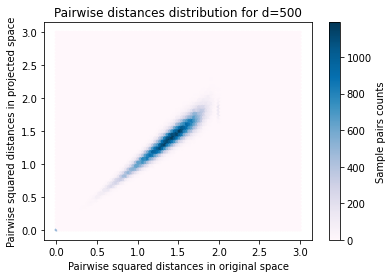

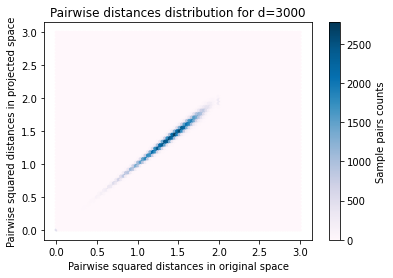

In [ ]:
from time import time

s   = 10
for d in d_range:
  t0 = time()
  R=sparse_proj(s, D, d)
  #R=gaussian_proj(D,d)
  projected_data = data.dot(R)
  print(f"Projected {N} samples from {D} to {d} in {time() - t0}s")
  proj_dist_matrix_sq = cal_pairwise_proj_dist_sq(projected_data).ravel()
  proj_dist_matrix_sq = proj_dist_matrix_sq[nonzero]

  plt.figure()
  plt.hexbin(
          dist_matrix_sq,
          proj_dist_matrix_sq,
          gridsize=100,
          cmap=plt.cm.PuBu,
          extent=[0, 3.0, 0, 3.0],
  )
  plt.xlabel("Pairwise squared distances in original space")
  plt.ylabel("Pairwise squared distances in projected space")
  plt.title(f"Pairwise distances distribution for d={d}" )
  cb = plt.colorbar()
  cb.set_label("Sample pairs counts")

  rates = proj_dist_matrix_sq / dist_matrix_sq
  print(f"Mean distances rate: {mean(rates)} ({std(rates)})" )
  

